# Implementation of the Oslo model

In [20]:
import scipy as sp
import matplotlib.pyplot as plt
import random

The Oslo function which returns the distrabution of grains in each z value. 

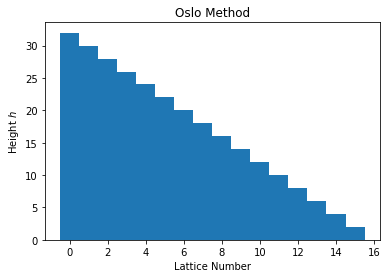

33.0

In [209]:
def Oslo(L,p,n):
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    h = sp.zeros(L)
    h_gone = 0
    n_grain = 0
    h_store = []
    
    def prob(p):
        if random.random() > p:
            return 1
        else:
            return 2
            
    for i in range(L):
        z_thresh[i] = prob(p)
    
    
    #Drive
    while n_grain < n:
        z[0] = z[0] + 1
        h[0] = h[0] + 1
        n_grain  = n_grain + 1
        h_store.append(h[0])
    #Relaxation
        for i in range(L):
            if z[i] > z_thresh[i]: 
      
                if i == 0:
                    z[i] = z[i] - 2
                    z[i+1] = z[i+1] + 1 
                    
                    h[i] = h[i] - 1
                    h[i+1] = h[i+1] + 1
                
                
                if i > 0 and i < (L -1):
                    z[i] = z[i] - 2
                    z[i+1] = z[i+1] + 1 
                    z[i-1] = z[i-1] + 1
                    
                    h[i] = h[i] - 1
                    h[i+1] = h[i+1] + 1
                    

                if i == L -1:
                    z[i] = z[i] - 1
                    z[i-1] = z[i-1] + 1
                    
                    h[i] = h[i] - 1
                    
                   
                    h_gone = h_gone + 1
                
                z_thresh[i] = prob(p)
                
             
    return z , h , h_store

def Oslo_plot(L,p,n):
    L_plot = sp.linspace(0,L-1,L)    
    plt.bar(L_plot,Oslo(L,p,n)[1], width = 1)
    plt.xlabel("Lattice Number")
    plt.ylabel("Height $h$")
    plt.title("Oslo Method")
    plt.show()
    
def Oslo_test(L,p,n):
    return sp.mean(Oslo(L,p,n)[2][int(n/2):n:1])

Oslo_plot(16,0.5,1000)
Oslo_test(16,0.5,1000)
